In [1]:
import os
BAR = 'Barcodes_1d'
ROOT = open('../root').read().strip()
print ROOT
img_path = os.path.join(ROOT, 'common')
print img_path
anno_path = os.path.join(ROOT, BAR, 'annotations.json')
print anno_path
empty_path = os.path.join(ROOT, 'Empty', 'annotations.json')
print empty_path

/home/nik-kochetov/work
/home/nik-kochetov/work/common
/home/nik-kochetov/work/Barcodes_1d/annotations.json
/home/nik-kochetov/work/Empty/annotations.json


In [2]:
import model
reload(model)
from model import SSDModel
ssd_model = SSDModel()

Using TensorFlow backend.


In [4]:
weights_path = os.path.join(ROOT, 'models_g2_0', 'model.25-03-2018.gen3.12_ssd_only_edges.ssd.04.hdf5')
ssd_model.model.load_weights(weights_path)

In [5]:
import json
with open(anno_path) as f:
    annos = json.loads(f.read())
print len(annos)
print annos[0]

with open(empty_path) as f:
    empty_annos = json.loads(f.read())
print len(empty_annos)
print empty_annos[0]

all_annos = annos + empty_annos

8111
{u'name': u'0001.jpg', u'shape': [3585, 2661, 3], u'Rects': [[594, 1081, 326, 575], [568, 1054, 1131, 1382], [593, 1074, 718, 968], [572, 1057, 1566, 1817], [564, 1050, 1964, 2217], [567, 1048, 2437, 2691]], u'path': u'Barcodes_1d/UPC-E', u'id': u'0001', u'Types': [u'UPCE', u'UPCE', u'UPCE', u'UPCE', u'UPCE', u'UPCE']}
10156
{u'Rects': [], u'path': u'Empty', u'shape': [4400, 3400, 3], u'name': u'9468_020.4B.tif.jpg', u'Types': []}


In [6]:
from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image

import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline

In [7]:
print ssd_model.cls_names
print ssd_model.bbox_names

[]
['lr_bbox', 'tb_bbox']


In [8]:
def tensor_dict_to_list(model, tensor_dict):
    lst = []
    for name in ssd_model.bbox_names:
        lst.append(tensor_dict[name])
    for name in ssd_model.cls_names:
        lst.append(tensor_dict[name])
    return lst

In [9]:
import generator
reload(generator)
from generator import Generator
ssd_generator = Generator(ROOT, ssd_model)

In [10]:
generator = ssd_generator.generate(all_annos, 1 * 512 * 512, True)

In [62]:
gen = next(generator)

next batch:
('img:', u'Barcodes_1d/Code 39.FullASCII Gray Bad/0004.jpg')
('window: ', Rect(1344, 46, 2368, 1070))
('tensors:', [(0, 0, 0.0, 0.265625, 1.0, 0.609375, 0.34375), (1, 0, 0.0, 0.0, 1.0, 0.109375, 0.109375)])


In [63]:
for key, value in gen[1].items():
    print key, value.shape
print gen[0]['input'].shape

tb_bbox (1, 7, 7, 3)
class (1, 7, 7, 2)
lr_bbox (1, 7, 7, 3)
(1, 512, 512, 3)


In [64]:
print all_annos[0]['path'] + '/' + all_annos[0]['name']

Barcodes_1d/UPC-E/0001.jpg


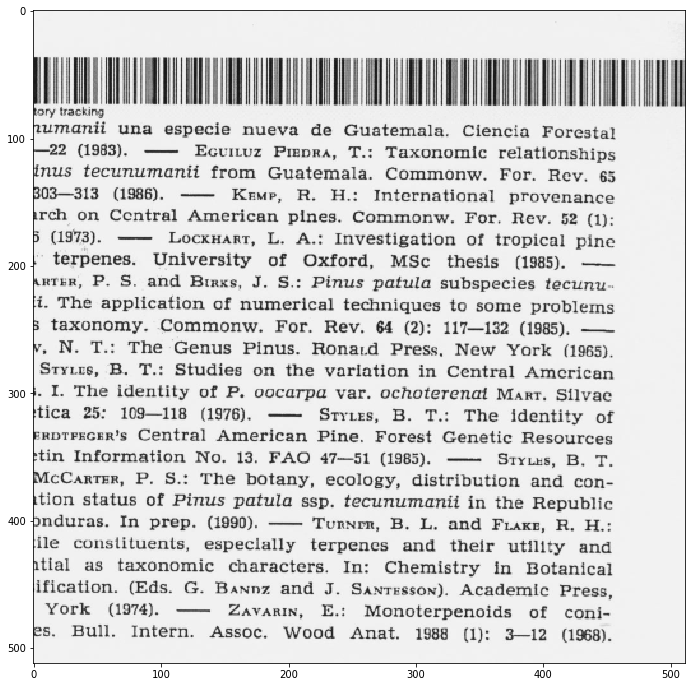

In [65]:
def show_img_from_gen(ax, gen):
    def unprocess(y):
            x = np.copy(y)
            # Zero-decenter by mean pixel
            x[:, :, :, 0] += 103.939
            x[:, :, :, 1] += 116.779
            x[:, :, :, 2] += 123.68

            # 'BGR'->'RGB'
            x = x[:, :, :, ::-1]
            #print np.max(x), np.min(x)
            return x / 265.0


    ax.imshow(np.reshape(unprocess(gen[0]['input'])[0], gen[0]['input'].shape[1:]))
    
    
fig, ax = plt.subplots(figsize=(12, 12))
show_img_from_gen(ax, gen)

In [66]:
import converter
reload(converter)
ssd_converter = converter.Converter(ssd_model)

In [67]:
tensors = [gen[1][name] for name in ssd_model.bbox_names + ssd_model.cls_names + ['class']]

In [68]:
confs, rects = ssd_converter.restore_rects(tensors, top=20)
print confs
for rect in rects:
    print rect

(0.84790739260051928, 0.84790739260051928, 0.15209260739948077, 0.15209260739948077, 0.15209260739948077, 0.15209260739948077, 0.15209260739948077, 0.15209260739948077, 0.15209260739948077, 0.15209260739948077, 0.15209260739948077, 0.15209260739948077, 0.15209260739948077, 0.15209260739948077, 0.15209260739948077, 0.15209260739948077, 0.15209260739948077, 0.15209260739948077, 0.15209260739948077, 0.15209260739948077)
Rect(0.0, 34.0, 128.0, 78.0)
Rect(0.0, 64.0, 128.0, 78.0)
Rect(64.0, 0.0, 192.0, 128.0)
Rect(128.0, 0.0, 256.0, 128.0)
Rect(192.0, 0.0, 320.0, 128.0)
Rect(256.0, 0.0, 384.0, 128.0)
Rect(320.0, 0.0, 448.0, 128.0)
Rect(384.0, 0.0, 512.0, 128.0)
Rect(64.0, 64.0, 192.0, 192.0)
Rect(128.0, 64.0, 256.0, 192.0)
Rect(192.0, 64.0, 320.0, 192.0)
Rect(256.0, 64.0, 384.0, 192.0)
Rect(320.0, 64.0, 448.0, 192.0)
Rect(384.0, 64.0, 512.0, 192.0)
Rect(0.0, 128.0, 128.0, 256.0)
Rect(64.0, 128.0, 192.0, 256.0)
Rect(128.0, 128.0, 256.0, 256.0)
Rect(192.0, 128.0, 320.0, 256.0)
Rect(256.0, 128.

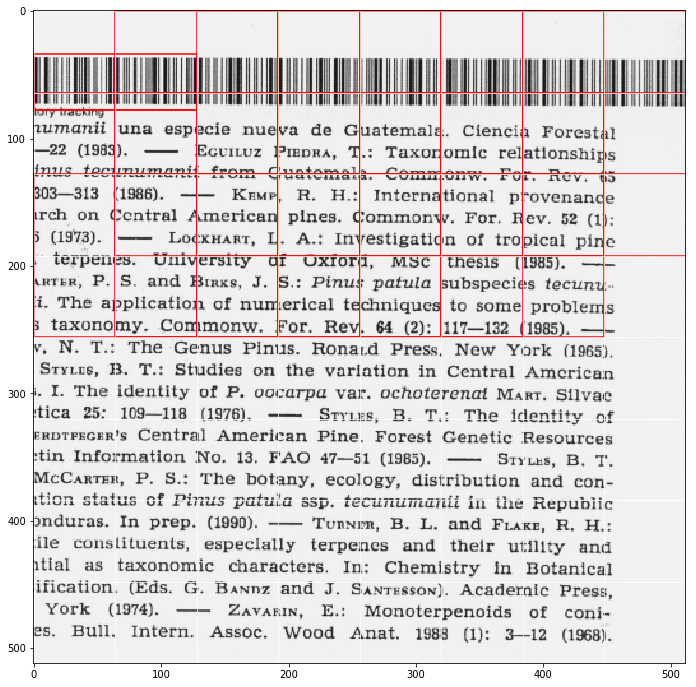

In [69]:
# Create figure and axes
fig,ax = plt.subplots(1, figsize=(12, 12))

# Display the image
show_img_from_gen(ax, gen)
shape = gen[0]['input'].shape[1:3]

#r = patches.Rectangle((50,50),100,100,linewidth=2,edgecolor='r',facecolor='none')
#ax.add_patch(r)

from rect import Rect
def clip_rect(rect, h, w):
    return Rect(max(0, rect.left), max(0, rect.top), min(w, rect.right), min(h, rect.bottom))

for rect in rects[:]:
    # Create a Rectangle patch
    rr = clip_rect(rect, shape[0], shape[1])
    r = patches.Rectangle((rr.left,rr.top),rr.width(),rr.height(),linewidth=1.5,edgecolor='r' ,facecolor='none')

    # Add the patch to the Axes
    ax.add_patch(r)
    
cnt = gen[1]['class'].shape[1] + 1
edge = shape[0] / cnt
    
for i in range(cnt):
    for j in range(cnt):
    # Create a Rectangle patch
        rr = Rect(edge * i, edge * j, edge * (i + 1), edge * (j + 1))
        r = patches.Rectangle((rr.left,rr.top),rr.width(),rr.height(),linewidth=0.5,edgecolor='w',facecolor='none')

        # Add the patch to the Axes
        ax.add_patch(r)

plt.show()

In [70]:
pred_tensors = ssd_model.model.predict(gen[0])

In [71]:
confs, rects = ssd_converter.restore_rects(pred_tensors + [gen[1]['class']], top=20)

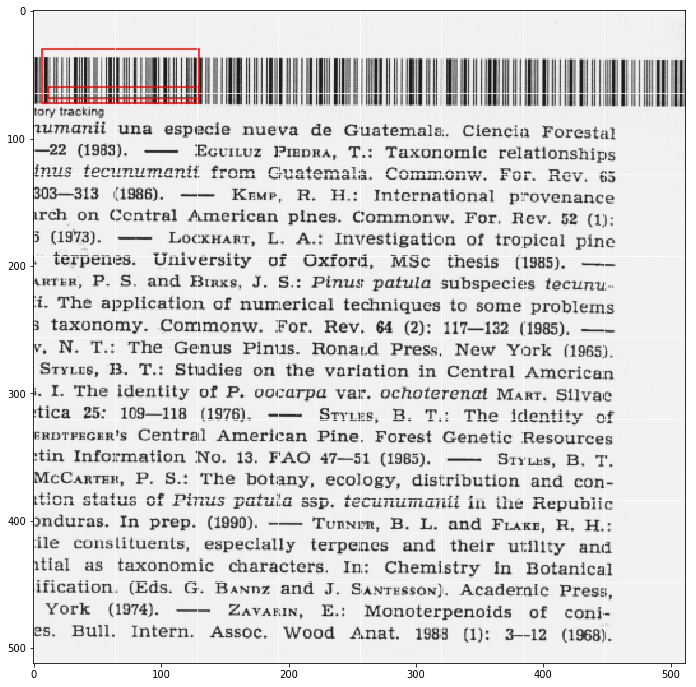

In [73]:
# Create figure and axes
fig,ax = plt.subplots(1, figsize=(12, 12))

# Display the image
show_img_from_gen(ax, gen)
shape = gen[0]['input'].shape[1:3]

#r = patches.Rectangle((50,50),100,100,linewidth=2,edgecolor='r',facecolor='none')
#ax.add_patch(r)

from rect import Rect
def clip_rect(rect, h, w):
    return Rect(max(0, rect.left), max(0, rect.top), min(w, rect.right), min(h, rect.bottom))

for rect in rects[:2]:
    # Create a Rectangle patch
    rr = clip_rect(rect, shape[0], shape[1])
    r = patches.Rectangle((rr.left,rr.top),rr.width(),rr.height(),linewidth=1.5,edgecolor='r' ,facecolor='none')

    # Add the patch to the Axes
    ax.add_patch(r)
    
cnt = gen[1]['class'].shape[1] + 1
edge = shape[0] / cnt
    
for i in range(cnt):
    for j in range(cnt):
    # Create a Rectangle patch
        rr = Rect(edge * i, edge * j, edge * (i + 1), edge * (j + 1))
        r = patches.Rectangle((rr.left,rr.top),rr.width(),rr.height(),linewidth=0.5,edgecolor='w',facecolor='none')

        # Add the patch to the Axes
        ax.add_patch(r)

plt.show()

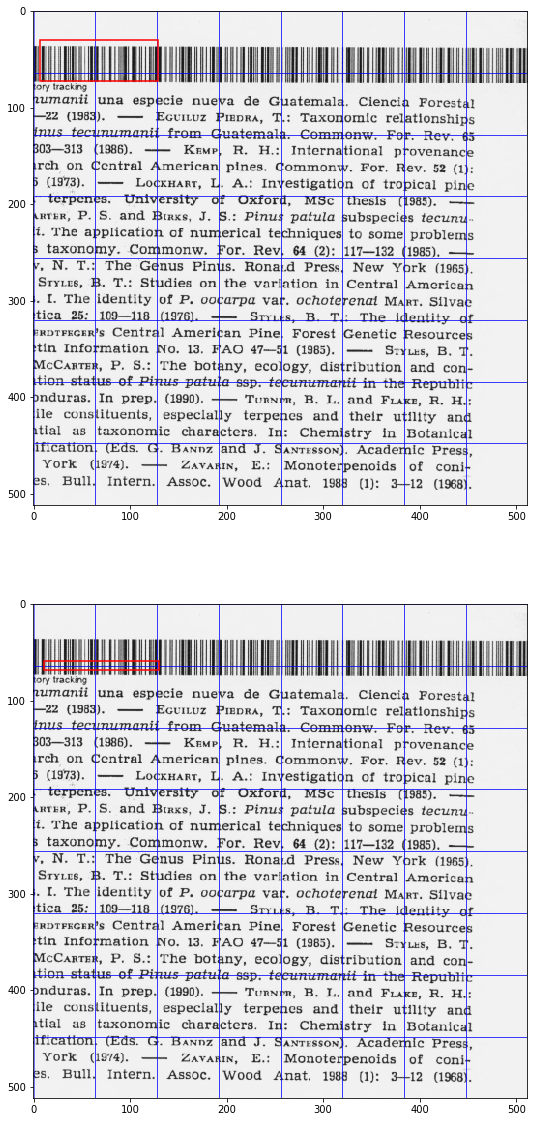

In [75]:
num_rects = min(2, len(rects))

# Create figure and axes
fig,ax = plt.subplots(num_rects, 1, figsize=(10, num_rects * 10))
shape = gen[0]['input'].shape[1:3]

cnt = gen[1]['class'].shape[1] + 1
edge = shape[0] / cnt

def clip_rect(rect, h, w):
    return Rect(max(0, rect.left), max(0, rect.top), min(w, rect.right), min(h, rect.bottom))

for k in range(num_rects):

    # Display the image
    show_img_from_gen(ax[k], gen)
    
    # Display cells
    for i in range(cnt):
        for j in range(cnt):
            rr = Rect(edge * i, edge * j, edge * (i + 1), edge * (j + 1))
            r = patches.Rectangle((rr.left,rr.top),rr.width(),rr.height(),linewidth=0.5,edgecolor='b',facecolor='none')
            ax[k].add_patch(r)
    
    rect = rects[k]

    # Create a Rectangle patch
    rr = clip_rect(rect, shape[0], shape[1])
    r = patches.Rectangle((rr.left,rr.top),rr.width(),rr.height(),linewidth=1.5,edgecolor='r' ,facecolor='none')

    # Add the patch to the Axes
    ax[k].add_patch(r)

plt.show()